In [1]:
import numpy as np
import os
import scipy
import math
import scipy.io.wavfile as wav
from scipy import signal
import matplotlib.pyplot as plt

from helper import Oct3smooth
from helper import SII
from helper import audioread
from helper import rms
from helper import SpeechArray
from helper import audiowrite

In [43]:
# Enter here the path where the Matrix sentences are stored:
dir_where_AFC = "AFC_for_lectures_2022"
# dir_where_AFC = 'H:\\Desktop\\HearingLab4\\AFC_for_lectures_20200427'
filesep = os.path.sep
dir_where    = dir_where_AFC+filesep+'sounds'+filesep+'vlmatrix'+filesep+'00-original'+filesep # broadband VlMatrix material
dir_where_LP = dir_where_AFC+filesep+'sounds'+filesep+'vlmatrix'+filesep+'01-LP'+filesep # here you will store the LP files
print(f"dir where LP: {dir_where_LP}")
dir_where_HP = dir_where_AFC+filesep+'sounds'+filesep+'vlmatrix'+filesep+'02-HP'+filesep # here you will store the HP files
print(f"dir where HP: {dir_where_HP}")

dir where LP: AFC_for_lectures_2022\sounds\vlmatrix\01-LP\
dir where HP: AFC_for_lectures_2022\sounds\vlmatrix\02-HP\


In [44]:
freq_i  = 160*np.power(2, (1./3.)*np.arange(0,18)) # 18 frequencies spaced from 160 Hz and upwards in 1/3 OB
freq_i

array([ 160.        ,  201.58736798,  253.98416831,  320.        ,
        403.17473597,  507.96833663,  640.        ,  806.34947193,
       1015.93667326, 1280.        , 1612.69894387, 2031.87334652,
       2560.        , 3225.39788773, 4063.74669304, 5120.        ,
       6450.79577546, 8127.49338608])

In [45]:
### Processing one sound, the speech-shaped noise:
# 1. Loading the sound with the custo function audioread 
fname_noise = dir_where+'VlMatrixnoise_ltass.wav'
fs, noise = audioread(fname_noise)

# 2. Plotting the spectrum:
#    2.1 Fast Fourier Transform
N = 2**15
K = round(N/2)
noise_fft = np.fft.fft(noise,n=N)
noise_fft = noise_fft[0:K-1] # only first half of the FFT (the other half is mirrored)
f = np.arange(0,K-1)
f = f/K*(fs/2) # if you perform N-point FFTs you can use this f for all your plots

#    2.2 Converting to dB (note that the amplitudes are relative...):
# Spectrum:
noise_dB        = 20*np.log10(abs(noise_fft))
# Smoothed spectrum:
noise_dB_smooth = Oct3smooth(f,noise_dB,freq_i)

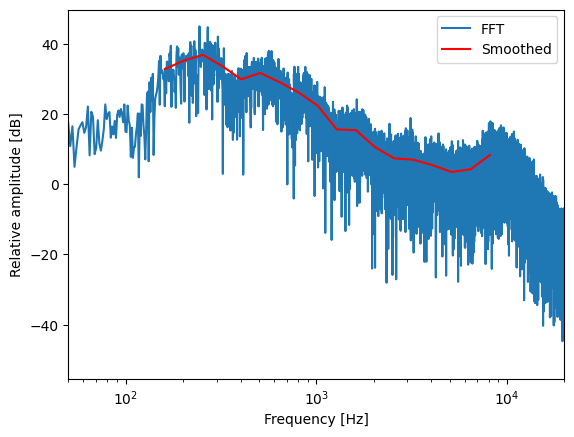

In [46]:
plt.semilogx(f,noise_dB)

plt.plot(freq_i,noise_dB_smooth,'r')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Relative amplitude [dB]')
plt.xlim((50,20000))

plt.legend(['FFT','Smoothed'])

AFC_for_lectures_2022\sounds\vlmatrix\00-original\
	 61 sounds were found
Loading sentence 00131.wav
Loading sentence 01597.wav
Loading sentence 01672.wav
Loading sentence 03841.wav
Loading sentence 05780.wav
Loading sentence 09091.wav
Loading sentence 11772.wav
Loading sentence 12383.wav
Loading sentence 13331.wav
Loading sentence 16266.wav
Loading sentence 18004.wav
Loading sentence 19903.wav
Loading sentence 20736.wav
Loading sentence 21138.wav
Loading sentence 24088.wav
Loading sentence 24459.wav
Loading sentence 28515.wav
Loading sentence 29523.wav
Loading sentence 31109.wav
Loading sentence 32364.wav
Loading sentence 35933.wav
Loading sentence 38957.wav
Loading sentence 39049.wav
Loading sentence 39851.wav
Loading sentence 43590.wav
Loading sentence 43668.wav
Loading sentence 43841.wav
Loading sentence 45858.wav
Loading sentence 47370.wav
Loading sentence 47874.wav
Loading sentence 50526.wav
Loading sentence 54584.wav
Loading sentence 56264.wav
Loading sentence 56265.wav
Loading 

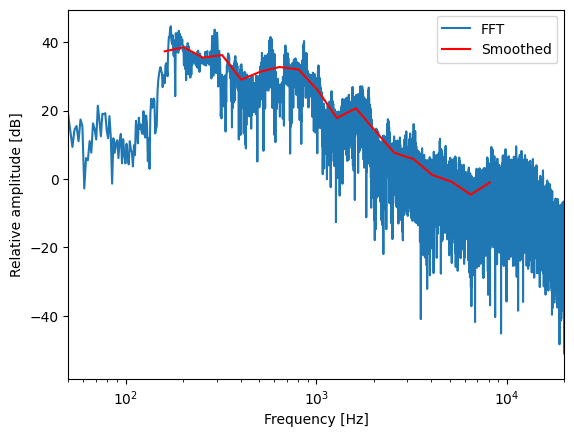

In [47]:
# Cell [6]: Include your code here to add the spectrum of one sentence from the materials. 
#           It may be helpful to add in the same plot the noise spectrum. Please choose a
#           clear way to visualise the sentence and noise spectra.

# Some help: 'insig1 = SpeechArray(dir_where,1)' will give you one sentence at random, alternatively 
#                you can also load insig1 as done in Cell[5] with 'noise' using audioread
#            'insig10= SpeechArray(dir_where,10)' will give you 10 sentences at random 

insig1 = SpeechArray(dir_where, 1) #  (directory, number of sentences at random)  ->   dir where 00-original, 1 sentence at random
print(f"\n\n{insig1.shape}\n")

insig1_fft = np.fft.fft(insig1, n=N)
insig1_fft = insig1_fft[0:K-1] # only first half of the FFT (the other half is mirrored)

#    2.2 Converting to dB (note that the amplitudes are relative...):
insig1_dB        = 20*np.log10(abs(insig1_fft)) # Spectrum
insig1_dB_smooth = Oct3smooth(f,insig1_dB,freq_i) # Smoothed spectrum

# plotting
plt.semilogx(f,insig1_dB)

plt.plot(freq_i,insig1_dB_smooth,'r')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Relative amplitude [dB]')
plt.xlim((50,20000))

plt.legend(['FFT','Smoothed'])
plt.show()


AFC_for_lectures_2022\sounds\vlmatrix\00-original\
	 61 sounds were found
Loading sentence 00131.wav
Loading sentence 01597.wav
Loading sentence 01672.wav
Loading sentence 03841.wav
Loading sentence 05780.wav
Loading sentence 09091.wav
Loading sentence 11772.wav
Loading sentence 12383.wav
Loading sentence 13331.wav
Loading sentence 16266.wav
Loading sentence 18004.wav
Loading sentence 19903.wav
Loading sentence 20736.wav
Loading sentence 21138.wav
Loading sentence 24088.wav
Loading sentence 24459.wav
Loading sentence 28515.wav
Loading sentence 29523.wav
Loading sentence 31109.wav
Loading sentence 32364.wav
Loading sentence 35933.wav
Loading sentence 38957.wav
Loading sentence 39049.wav
Loading sentence 39851.wav
Loading sentence 43590.wav
Loading sentence 43668.wav
Loading sentence 43841.wav
Loading sentence 45858.wav
Loading sentence 47370.wav
Loading sentence 47874.wav
Loading sentence 50526.wav
Loading sentence 54584.wav
Loading sentence 56264.wav
Loading sentence 56265.wav
Loading 

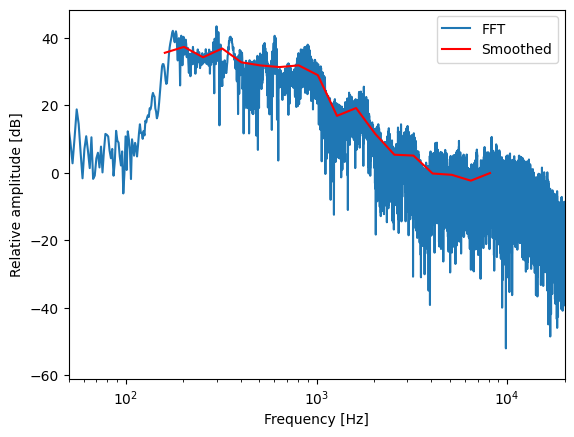

In [48]:
# Cell [7]: Include your code here to add the spectrum of 20 randomly chosen sentences. 
#           This code will be similar to that of cell [6] but you have to put first 
#           the 20 sentences all together as one big sentence (use the SpeechArray function
#           from helper.py)

insig20 = SpeechArray(dir_where, 20) #  (directory, number of sentences at random)  ->   dir where 00-original, 1 sentence at random
print(f"\n\n{insig20.shape}\n")

insig20_fft = np.fft.fft(insig20, n=N)
insig20_fft = insig20_fft[0:K-1] # only first half of the FFT (the other half is mirrored)

#    2.2 Converting to dB (note that the amplitudes are relative...):
insig20_dB        = 20*np.log10(abs(insig20_fft)) # Spectrum
insig20_dB_smooth = Oct3smooth(f,insig20_dB,freq_i) # Smoothed spectrum

# plotting
plt.semilogx(f,insig20_dB)

plt.plot(freq_i,insig20_dB_smooth,'r')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Relative amplitude [dB]')
plt.xlim((50,20000))

plt.legend(['FFT','Smoothed'])
plt.show()

In [49]:
# Cell [8]: Include your code here to assess the speech intelligibility index for LPF signals 
# f2test = [] # Hz, define here the 20 cut-off frequencies you want to test...
f2test = np.linspace(1000, 7500, 20) 
print(f"cut-off frequencies: {f2test}")

fc_low = [] # Hz, write down here (or later in the code), the cut-off frequency that gives an SII_value of 0.75

#         -> SII: speach intellegibility index: amount of a given speech signal that is audible to a listener

cut-off frequencies: [1000.         1342.10526316 1684.21052632 2026.31578947 2368.42105263
 2710.52631579 3052.63157895 3394.73684211 3736.84210526 4078.94736842
 4421.05263158 4763.15789474 5105.26315789 5447.36842105 5789.47368421
 6131.57894737 6473.68421053 6815.78947368 7157.89473684 7500.        ]


In [50]:
# Cell [9]: Include your code here to assess the speech intelligibility index for HPF signals 
# f2test = [] # Hz, define here the 20 cut-off frequencies you want to test...
f2test = np.linspace(1000, 7500, 20) 


fc_high = [] # Hz, write down here (or later in the code), the cut-off frequency that gives an SII_value of 0.75

In [62]:
# Cell [10]
filt_order = 4 # order of the Butterworth filter, use the same order for both LPF and HPF speech
fc_low_norm = .99 # put here the cut-off frequency normalised as required for signal.butter (use fc_low, of course)

lijsten = os.listdir(dir_where)

dir_here = dir_where_LP
print(dir_here)

for l in lijsten:
    
    if 'noise' in l: # Skip noise file
        print('Noise file skipped {}'.format(l))
        continue
    
    # Load here each insig to process
    fname = dir_where+l # loads the file names with no processing
    b, a = signal.butter(filt_order, fc_low_norm, 'low')

    # Filter here each insig using b and a coefficients
    fs, insig = audioread(fname) # read signal
    Filtered_sig = signal.filtfilt(a, b, insig)
    name = fname.split("\\")[-1]
# print(name)
# print(name[:-4])

    # Save the resulting waveforms to file in the directory 'dir_where_LP', use 'audiowrite'
    audiowrite(Filtered_sig, fs=fs, fname=f"{dir_here}{name[:-4]}_filtered.wav")

AFC_for_lectures_2022\sounds\vlmatrix\01-LP\
Noise file skipped VlMatrixnoise_ltass.wav


In [64]:
# Cell [11]: Similar to Cell[10] but for high-pass filter
fc_high_norm = .01 # put here the cut-off frequency normalised as required for signal.butter (use fc_high, of course)

dir_here = dir_where_HP
for l in lijsten:
    if 'noise' in l: # Skip noise file
        print('Noise file skipped {}'.format(l))
        continue
    
    # Load here each insig to process
    fname = dir_where+l # loads the file names with no processing
    b, a = signal.butter(filt_order, fc_high_norm, 'high')

    # Filter here each insig using b and a coefficients
    fs, insig = audioread(fname) # read signal
    Filtered_sig = signal.filtfilt(a, b, insig)

    name = fname.split("\\")[-1]
    # Save the resulting waveforms to file in the directory 'dir_where_HP', use 'audiowrite'
    audiowrite(Filtered_sig, fs=fs, fname=f"{dir_here}{name[:-4]}_filtered.wav")

LinAlgError: Singular matrix

In [ ]:
# If everything went as expected your low-pass filtered and high-pass filtered speech should be in the folders
#     01-LP/
#     02-HP/
#     00-original/ (broadband files, already available)

# Don't forget to listen to your sounds to know how LP and HP speech sounds like
# Now you should be ready to start the AFC experiment, go to MATLAB!

# Success!